3.0
6.0
9.0


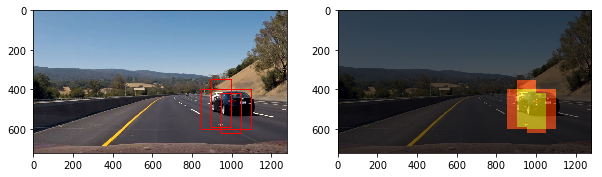

In [139]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_heat_img(heatmap, img, weight = (0.4,0.6)):
    hot_colors = [(90,0,0), (212,0,0), (255, 63, 0), (255,103,0), (255,225,0), (255,225,0), (255,225,0)]

    heatmap_clipped = np.clip(heatmap, 0, 255)

    max_heat = np.max(heatmap_clipped)
    cap = len(hot_colors)

    if max_heat >= cap:
        heatmap_clipped = (heatmap_clipped / max_heat) * cap

    heat_img = np.zeros(shape=img.shape).astype(np.uint8)

    for index, color in enumerate(hot_colors):
        heat_img[heatmap_clipped > index] = color

    return cv2.addWeighted(img, weight[0], heat_img, weight[1], 0)

def add_heat(windows):
    for window in windows:
        heatmap[window[0][1]:window[1][1], window[0][0]:window[1][0]] += 1

windows = [((850,400), (1100, 600)), ((900,350), (1000,590)), ((950,420),(1050,620))]

img = cv2.imread('./project_video-frames/0800.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
heatmap = np.zeros(shape=img.shape[:2])

add_heat(windows)
print(np.max(heatmap))
add_heat(windows)
print(np.max(heatmap))
add_heat(windows)
print(np.max(heatmap))
add_heat(windows)

heat_img = get_heat_img(heatmap, img)

for w in windows:
    cv2.rectangle(img, w[0], w[1], (255,0,0), 4)

f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.imshow(img)
ax2.imshow(heat_img)

plt.show()

# spikes = np.sum(heatmap, axis=1)
# print(np.max(spikes.shape))
# pts = np.dstack((np.arange(0,720), spikes)).astype(np.int32)
# print(pts.shape)

#pts = np.array([[[195,300],[378,327],[286,500]]]).astype(np.int32)
#print(pts.shape)

#cv2.polylines(heat_img, pts, False, (0,0,255), 6)

# plt.imshow(heat_img)
# plt.show()


[ 900  901  902 ..., 1047 1048 1049]
900 400 1049 599


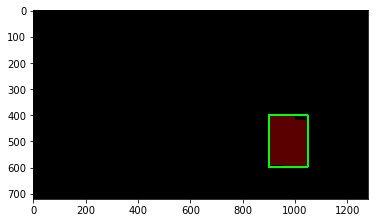

In [109]:
hm = np.copy(heatmap)
hm /= np.max(hm)
hm[hm < 0.5] = 0

zy, zx = hm.nonzero()
print(zx)
left = np.min(zx)
right = np.max(zx)
top = np.min(zy)
bottom = np.max(zy)

print(left, top, right, bottom)
heat_img = get_heat_img(hm, img, (0,1))

cv2.rectangle(heat_img, (left, top), (right, bottom), (0,255,0), 6)

# y = np.argmax(np.sum(heatmap, axis=1))
# x = np.argmax(np.sum(heatmap, axis=0))
# print(x,y)

# cv2.circle(heat_img, (x,y), 100, (0,255,0), 6)

plt.imshow(heat_img)
plt.show()

In [154]:
box = ((1000,390),(1211,505))

((850, 400), (1100, 600))
((900, 350), (1000, 590))
True


(1, 2, 2)


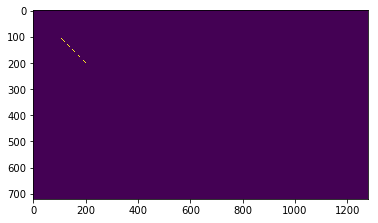

In [70]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

a3 = np.array( [[[100,100],[200,200]]], dtype=np.int32 )
print(a3.shape)
im = np.zeros([720,1280],dtype=np.uint8)


cv2.polylines( im, a3, False, 255 )

plt.imshow(im)
plt.show()

In [11]:
import numpy as np

class T:
    def __init__(self, mul):
        self.hogs = [[1 * mul,2 * mul, 3 *mul],[4 * mul,5 * mul,6 * mul]]
        self.color_hist = [[7 * mul,8 * mul],[9 * mul,10 * mul]]
        self.spatial = [[11 * mul],[12 * mul]]

t1 = T(1)
t2 = T(2)
print(t1.hogs)
print(t2.hogs)
print(t1.color_hist)
print(t2.color_hist)
print(t1.spatial)
print(t2.spatial)

np.hstack((t1.hogs, t2.hogs, t1.color_hist, t2.color_hist, t1.spatial, t2.spatial))

[[1, 2, 3], [4, 5, 6]]
[[2, 4, 6], [8, 10, 12]]
[[7, 8], [9, 10]]
[[14, 16], [18, 20]]
[[11], [12]]
[[22], [24]]


array([[ 1,  2,  3,  2,  4,  6,  7,  8, 14, 16, 11, 22],
       [ 4,  5,  6,  8, 10, 12,  9, 10, 18, 20, 12, 24]])

In [39]:
import math

x = np.arange(17)
y = np.ravel(x)

rows_required = 6
print(rows_required)

cols = (x.shape[0] // rows_required)

if (x.shape[0] % rows_required) != 0:
    rows_required -= 1
    cols = (x.shape[0] // rows_required)
    good_features = rows_required * cols
    
    print(good_features)
    
    for_mean = x[:good_features].reshape(-1, cols)
    print('for mean', for_mean)
    
    mean = np.mean(for_mean, axis=1)
    print(mean)
    mean =  np.hstack((mean, np.mean(x[good_features:])))
    print(mean)

6
15
for mean [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[  1.   4.   7.  10.  13.]
[  1.    4.    7.   10.   13.   15.5]


In [69]:
import math

big_hog = np.arange(9*9).reshape(9,9)
print('Hog is:', big_hog)

pixels = big_hog.ravel()

#for row in range(0, big_hog.shape[0], 3):
for col in range(0, big_hog.shape[1], 3):
    box = [col, col+1, col+2,col+9, col+1+9, col+2+9,col+18, col+1+18, col+2+9+9]
    box = np.array(box)
    print(pixels[box])
    
indices = np.arange(9).reshape(3,3)
print('Indices:',indices)
print(indices + 9)
print(indices + 18)

Hog is: [[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]
 [27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44]
 [45 46 47 48 49 50 51 52 53]
 [54 55 56 57 58 59 60 61 62]
 [63 64 65 66 67 68 69 70 71]
 [72 73 74 75 76 77 78 79 80]]
[ 0  1  2  9 10 11 18 19 20]
[ 3  4  5 12 13 14 21 22 23]
[ 6  7  8 15 16 17 24 25 26]
Indices: [[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 9 10 11]
 [12 13 14]
 [15 16 17]]
[[18 19 20]
 [21 22 23]
 [24 25 26]]


In [81]:
x = np.arange(720*1280).reshape(720,1280,1)
y = np.arange(720*1280).reshape(720,1280,1) * 10

avg = np.average((x,y),axis=0)
print(avg.shape)
print(x[0,0:10])
print(y[0,0:10])
print(avg[0,0:10])



(720, 1280, 1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]
 [60]
 [70]
 [80]
 [90]]
[[  0. ]
 [  5.5]
 [ 11. ]
 [ 16.5]
 [ 22. ]
 [ 27.5]
 [ 33. ]
 [ 38.5]
 [ 44. ]
 [ 49.5]]


640 683.577871374 141.902650954


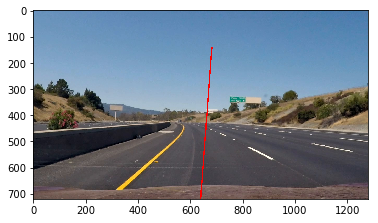

In [101]:
import cv2
import matplotlib.pyplot as plt

center = 1280 // 2
theta = 85 * np.pi / 180
r = 500
x = center + r * np.cos(theta)
y = center - r * np.sin(theta)

print(center, x, y)

img = cv2.imread('./project_video-frames/0000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.line(img, (int(center), 720), (int(x), int(y)), (255, 0, 0), 4)
plt.imshow(img)
plt.show()



In [104]:
x = [1,2,3,4,5,6,7,8,9,10]

for index, data in enumerate(x):
    if data % 2 == 0:
        del x[index]
        
print(x)

[1, 3, 5, 7, 9]
